# EXPLORATORY DATA ANALYSIS (EDA)  

### В этом ноутбуке содержатся тренировочные материалы, решение задач с онлайн-курса по предобработке и анализу данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)     # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывть больше колонок

## Основные цели EDA:

- Проверить качество данных и очистить их, если это необходимо.  
- Сформулировать предположения и гипотезы для дальнейшего построения модели.  
- Определиться с параметрами модели.

**В этом ноутбуке используется датасет с информацией о компаниях-производителях шоколада и их продукции.**   
**В датасете представлены следующие данные:**

- Bar id — ID шоколадного батончика в базе данных
- Company (Maker-if known) — название компании, изготовившей батончик.
- Specific Bean Origin or Bar Name — точное место происхождения какао-бобов.
- Broad Bean Origin — название региона, где были выращены какао-бобы.
- Company Location — страна, в которой произведён шоколадный батончик.
- Bean Type — вид какао-бобов, используемых в батончике.
- REF — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.
- Review Date — год публикации рецензии.
- Cocoa Percent — процент какао в шоколаде.
- Rating — оценка батончика фокус-группой.

### *Research tells us fourteen out of any ten individuals like chocolate*
#### — Sandra Boynton

In [96]:
# Загрузим и детально посмотрим на данные 
cacao = pd.read_csv('cacao_flavors.csv')
display(cacao.head(3))
cacao.info()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [141]:
# Выведем статистическую информацию
display(cacao.describe())
cacao.describe(include = 'object')

,Bar id,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,898.000000,1035.904735,2012.325348,3.422981
std,518.316184,552.886365,2.927210,1.750584
min,1.000000,5.000000,2006.000000,1.000000
25%,449.500000,576.000000,2010.000000,3.000000
50%,898.000000,1069.000000,2013.000000,3.250000
75%,1346.500000,1502.000000,2015.000000,3.500000
max,1795.000000,1952.000000,2017.000000,19.750000


,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,Cocoa\nPercent,Company\nLocation,Bean\nType,Broad Bean\nOrigin
count,1795,1795,1795,1795,1794,1794
unique,408,1013,59,60,41,100
top,,,70%,U.S.A.,,Venezuela
freq,99,58,664,764,887,214


In [97]:
# Для удобства использования pandas переименуем все столбцы
display(cacao.columns)
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date', 'cocoa_percent', 
                 'company_location', 'rating', 'bean_type', 'broad_origin']
display(cacao.columns)
cacao.head(3)

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

Index(['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin'],
      dtype='object')

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo


## Рассмотрим все 10 столбцов по отдельности

### 1. Столбец bar_id

Уникальных значений bar_id: 1795


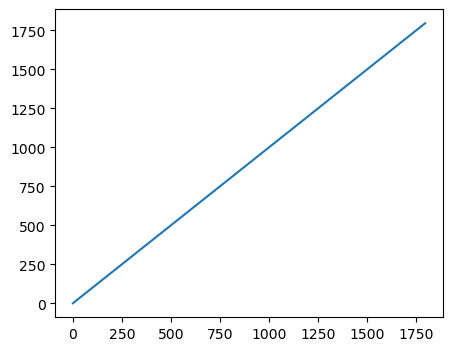

In [30]:
print(f'Уникальных значений bar_id: {cacao.bar_id.nunique()}')
plt.figure(figsize = (5, 4))
plt.plot(cacao.bar_id)
plt.show()

Это столбец индексов батончиков, количество уникальных значений соответствует количеству строк. Он не пригодится для дальнейшего анализа, удалим его.

In [98]:
# Удалим столбец bar_id
cacao.drop(['bar_id'], inplace = True, axis = 1)

### 2. Столбец company

In [36]:
# Посмотрим, сколько компаний содержит датасет
cacao['company'].value_counts().to_frame()

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
...,...
ChocoReko,1
Chocolats Privilege,1
Metropolitan,1
Chocolate Conspiracy,1


In [99]:
# Отфильтруем лишние данные и выведем только те компании, у которых в рейтинге больше 10 продуктов.
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)
display(cacao.company.value_counts())
print('Значений, встретившихся в столбце больше 10 раз:', (cacao.company.value_counts() > 10).sum())

Soma                   45
Fresco                 26
Bonnat                 26
Pralus                 25
Domori                 22
                       ..
Mayacama                1
ChocoReko               1
Chocolats Privilege     1
Metropolitan            1
Ki' Xocolatl            1
Name: company, Length: 407, dtype: int64

Значений, встретившихся в столбце больше 10 раз: 30


In [40]:
display(cacao.loc[:, ['company']].info())
print(f'Пропущенных значений в столбце "company": {cacao.company.isna().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


None

Пропущенных значений в столбце "company": 99


#### Итого, 407 уникальных значений и 99 строк, в которых производитель неизвестен. А вот компаний, у которых в рейтинге больше 10 батончиков, всего 30. Заполнить пропуски на данный момент не представляется возможным, т.к. вариантов для заполнения довольно много.

### 3. Столбец specific_origin

In [41]:
# Посмотрим, сколько уникальных регионов в датасете
display(cacao.specific_origin.value_counts())

# len(cacao.specific_origin.unique())
# len(cacao.specific_origin.value_counts())
print(f'Уникальных значений в столбце "specific_origin": {cacao.specific_origin.nunique()}')

                                  58
Madagascar                        55
Peru                              44
Ecuador                           39
Dominican Republic                33
                                  ..
Sambirano Valley, #215, MR, MC     1
Chuao, #218, MR, MC                1
Chuao, #217, DR, MC                1
Jamaica, #204, DR, SC              1
Brazil, Mitzi Blue                 1
Name: specific_origin, Length: 1013, dtype: int64

Уникальных значений в столбце "specific_origin": 1013


In [100]:
# Отфильтруем лишние данные
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)
print(f'Уникальных значений в столбце "specific_origin": {cacao.specific_origin.value_counts().count()}')
print('Значений, встретившихся в столбце больше 10 раз:', (cacao.specific_origin.value_counts() > 10).sum())

Уникальных значений в столбце "specific_origin": 1012
Значений, встретившихся в столбце больше 10 раз: 15


In [43]:
cacao.loc[:, ['specific_origin']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   specific_origin  1737 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


#### В датасете всего 1012 уникальных регионов. Значений, встретившихся в столбце больше 10 раз всего 15. 

### 4. Столбец ref

In [151]:
display(cacao.head(3))
cacao.loc[:, ['ref']].info()

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ref     1795 non-null   int64
dtypes: int64(1)
memory usage: 14.1 KB


count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

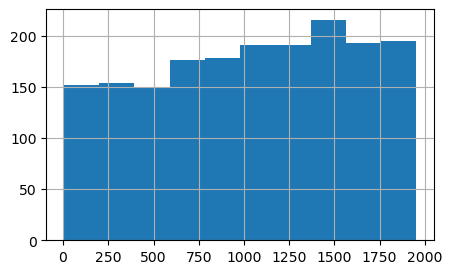

In [48]:
# Столбец ref числовой и без пропусков. Посмотрим на его распределение.
cacao.ref.hist(figsize = (5, 3))
cacao.ref.describe()

#### Как видно, у этого признака распределение без аномалий, выбросов нет. Заметен тренд на возрастание количества отзывов со временем (так как REF обозначает время внесения отзыва в базу). Интересно, почему так происходит?

### 5. Столбец review_date

In [153]:
# Посмотрим на данные в столбце
cacao.loc[:, ['review_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   review_date  1795 non-null   int64
dtypes: int64(1)
memory usage: 14.1 KB


Этот столбец также числовой и у него также нет пропусков. Посмотрим, как ведет себя распределение этого признака.

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

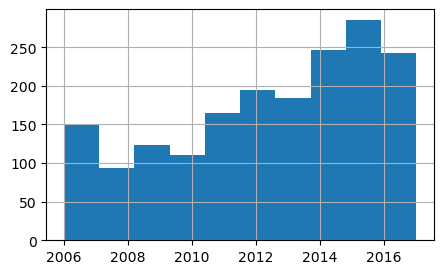

In [51]:
# Столбец review_date числовой и у него также нет пропусков. Посмотрим, как ведет себя распределение этого признака
cacao.review_date.hist(figsize = (5, 3))
cacao.review_date.describe()

#### Здесь также отсутствуют выбросы и заметен тренд на увеличение ревью со временем.

### 6. Столбец cocoa_percent


In [155]:
# Посмотрим на данные в столбце
display(cacao.cocoa_percent.to_frame().head(3))
cacao.loc[:, ['ref']].info()

,cocoa_percent
0,63%
1,70%
2,670%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ref     1795 non-null   int64
dtypes: int64(1)
memory usage: 14.1 KB


#### Значения в столбцах представлены в виде процентов. Для дальнейшего анализа будет проще, если они будут представлены числами. 

In [101]:
# Подкорректируем значения в столбце
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))
cacao['cocoa_percent'].to_frame().head(3)

,cocoa_percent
0,63.0
1,70.0
2,670.0


count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

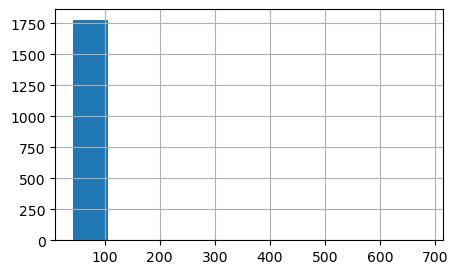

In [57]:
# Посмотрим распределение признака
cacao.cocoa_percent.hist(figsize = (5, 3))
cacao.cocoa_percent.describe()

Видим, что основное распределение лежит между 0 и 100 процентами и есть потенциальные выбросы свыше 100%.

Воспользуемся формулой интерквартильного расстояния (межквартильного размаха), чтобы отфильтровать выбросы.

**Выбросом считаются значения, которые лежат вне рамок:**  
**[percentile(25) -1.5 * IQR  :  percentile(75)+1.5 * IQR]**,     

где IQR = percentile(75) - percentile(25).

In [102]:
perc_25 = cacao.cocoa_percent.quantile(0.25)
perc_75 = cacao.cocoa_percent.quantile(0.75)
IQR = perc_75 - perc_25
print('25-й перцентиль: {},'.format(perc_25), '\n75-й перцентиль: {},'.format(perc_75), '\nIQR: {},'.format(IQR), 
      '\nГраницы выбросов: {f}, {i}.'.format(f = perc_25 - 1.5 * IQR, i = perc_75 + 1.5 * IQR ))

25-й перцентиль: 70.0, 
75-й перцентиль: 75.0, 
IQR: 5.0, 
Границы выбросов: 62.5, 82.5.


In [103]:
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc_25 - 1.5 * IQR, perc_75 + 1.5 * IQR)]

0       63.0
1       70.0
3       70.0
4       70.0
5       70.0
        ... 
1788    68.0
1790    70.0
1791    65.0
1792    65.0
1794    65.0
Name: cocoa_percent, Length: 1590, dtype: float64

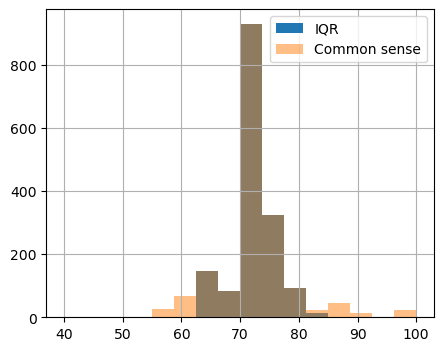

In [104]:
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc_25 - 1.5 * IQR, perc_75 + 1.5 * IQR)].hist(bins = 16, figsize = (5, 4),
range = (40, 100), label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100), label = 'Common sense')
plt.legend()

#### Формула помечает как выбросы слишком много потенциально реальных значений, поэтому воспользуемся здравым смыслом.

In [105]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

### 7. Столбец company_location

In [162]:
# Посмотрим на данные в столбце company_location
display(cacao.company_location.to_frame().head(3))
print(f'Уникальных значений в столбце "company_location":{cacao.company_location.nunique()}')

display(pd.DataFrame(cacao.company_location.value_counts()))
print('Значений, встретившихся в столбце больше 10 раз:', (cacao.company_location.value_counts() > 10).sum())

,company_location
0,France
1,France
3,France


Уникальных значений в столбце "company_location":60


,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Ghana,1
India,1
Eucador,1
Martinique,1


Значений, встретившихся в столбце больше 10 раз: 22


In [163]:
display(cacao.loc[:, ['company_location']].info())
print(f'Пропущенных значений в столбце "company_location": {cacao.company_location.isna().sum()}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


None

Пропущенных значений в столбце "company_location": 0


#### Стран намного меньше, чем регионов — всего 60. Стран, у которых больше 10 ревью —  22. Пустых значений нет.

### 8. Столбец rating

#### Rating — целевая переменная.

In [110]:
# Изучим данные
cacao[['rating']].sample(5)

,rating
173,2.75
760,3.50
64,2.75
1719,3.00
1502,3.00


count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

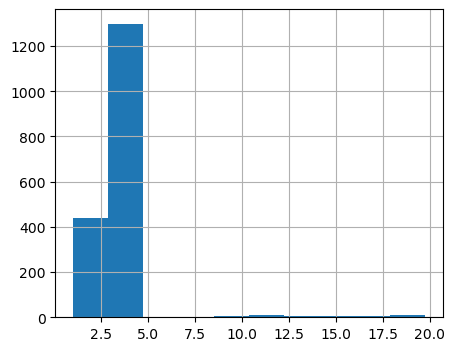

In [69]:
# Посмотрим на распределение оценок
cacao.rating.hist(figsize = (5, 4))
cacao.rating.describe()

#### Большинство оценок распределены между 3 и 3.5 (медиана 3.25, 25-й перцентиль 3 и 75-й перцентиль — 3.5), что позволяет сделать два предположения:

- cкорее всего была использована пятибалльная шкала оценивания;
- в данных есть выбросы.

In [95]:
# Проверим, есть ли в данных выбросы при попомщи IQR (межквартильного расстояния):
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc_25 = cacao.rating.quantile(0.25)
perc_75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc_25), '\n75-й перцентиль: {},'.format(perc_75), '\nIQR: {},'.format(IQR), 
      '\nГраницы выбросов: [{i}, {j}].'.format(i = perc_25 - 1.5 * IQR, j = perc_75 + 1.5 * IQR))

25-й перцентиль: 3.0, 
75-й перцентиль: 3.5, 
IQR: 0.5, 
Границы выбросов: [2.25, 4.25].


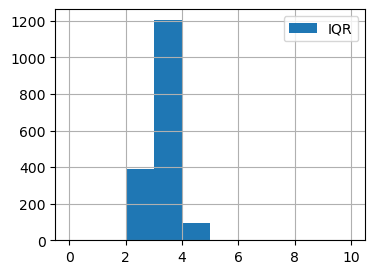

In [112]:
cacao.rating.loc[cacao.rating.between(perc_25 - 1.5 * IQR, perc_75 + 1.5 * IQR)].hist(bins = 10, range = (0, 10),
                                                                                 figsize = (4, 3), label = 'IQR')
plt.legend()

Этот способ позволил определить экстремально низкие и экстремально высокие оценки. 

In [113]:
# Отфильтруем данные:
cacao = cacao.loc[cacao.rating.between(perc_25 - 1.5 * IQR, perc_75 + 1.5 * IQR)]

### 9. Столбец bean_type

In [170]:
# Посмотрим на значения в столбце
display(cacao.bean_type.info())
print(f'Уникальных значений: {cacao.bean_type.nunique()}')
display(cacao.bean_type.to_frame())
cacao.bean_type.value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1690 entries, 1 to 1794
Series name: bean_type
Non-Null Count  Dtype 
--------------  ----- 
1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


None

Уникальных значений: 41


,bean_type
1,
3,
4,
5,Criollo
6,
...,...
1790,
1791,Forastero
1792,Forastero
1793,


                            829
Trinitario                  401
Criollo                     147
Forastero                    81
Forastero (Nacional)         50
Criollo, Trinitario          37
Blend                        36
Forastero (Arriba)           30
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        5
Nacional (Arriba)             3
Matina                        3
EET                           3
Beniano                       3
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Criollo, Forastero            2
Amazon, ICS                   2
Criollo (Amarru)              2
Amazon mix                    2
Nacional                      2
Criollo (Ocumare)             1
Criollo (Ocumare 67)          1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Trinitario, Nacional          1
Forastero (Amelonado)         1
Foraster

In [171]:
cacao[cacao.bean_type.isna()]

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70.0,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [114]:
# Заменим пропуски на None:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == ''  else x)

In [173]:
display(pd.DataFrame(cacao.bean_type.value_counts()).head(12))
print('Значений, встретившихся в столбце больше 10 раз:', (cacao.bean_type.value_counts() > 10).sum())
print('Уникальных значений:', cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце больше 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


- В данных есть строка со значением nan, необходимо для удобства заменить её на None.   
- Многие типы бобов указаны с пояснением, например "Criollo (Ocumare 67)", такие значения стоит привести к общему виду.   
- Некоторые батончики сделаны из комбинации какао-бобов. Возможно, этот столбец для дальнейшего анализа нужно будет преобразовать через метод get_dummies()

In [115]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [83]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print('Значений, встретившихся в столбце больше 10 раз:', (cacao.bean_type.value_counts() > 10).sum())
print('Уникальных значений:', cacao.bean_type.nunique(), end ='\n\n')
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Matina,3
Beniano,3
EET,3


Значений, встретившихся в столбце больше 10 раз: 5
Уникальных значений: 21

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


#### Количество уникальных значений в столбце сократилось до 21. Пустые значения заполнить не получится, так как есть пять самых популярных сортов какао  (10+ батончиков) .

### Столбец 10. broad_origin

In [88]:
display(cacao[['broad_origin']].head(5))
display(cacao.loc[:, ['broad_origin']].info())

,broad_origin
1,Togo
3,Togo
4,Peru
5,Venezuela
6,Cuba


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


None

In [89]:
cacao.broad_origin.value_counts()

Venezuela                       202
Ecuador                         179
Peru                            159
Madagascar                      138
Dominican Republic              135
                               ... 
Venez,Africa,Brasil,Peru,Mex      1
Dominican Rep., Bali              1
Ghana, Domin. Rep                 1
Trinidad, Ecuador                 1
Venezuela, Carribean              1
Name: broad_origin, Length: 97, dtype: int64

In [116]:
cacao.broad_origin = cacao.broad_origin.astype(str).apply(lambda x: None if x.strip() == '' else x)

### В столбце имеются пропуски и много повторяющихся значений с различным написанием. 

In [118]:
def fix_countries(x):
    if pd.isnull(x):
        return None
    if x == 'nan':
        return None
    if str(x).strip() == '':
        return x

    x = x.replace(' ', '')
    x = x.replace('/', ',')  # Venezuela/ Ghana
    x = x.replace('&', ',')

    if '(' in x:
        x = x[:x.find('(')]  # Peru(SMartin,Pangoa,nacional)

    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela')   # Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,')   # Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela')    # Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
    
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    x = x.replace('DominicanRepublic', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
    
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
    
    if 'Per' in x and 'Peru' not in x:
        x = x.replace('Per', 'Peru')
        
    x = x.replace('Nic.', 'Nicaragua')
    x = x.replace('Gre.', 'Grenada')
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    if ',' in x:
        x = x[:x.find(',')]
    
    return x

In [119]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries)

In [185]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts() > 10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,213
Ecuador,181
Peru,166
DomincanRepublic,162
Madagascar,140
...,...
Cameroon,1
Principe,1
Burma,1
Suriname,1


Значений, упомянутых более 10 раз: 25
Уникальных значений: 59
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1630 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


#### Количество уникальных значений сократилось . Такая трансформация в последствии поможет нам преобразовать данные через метод get_dummies(). Пропущенные значения заполнить не получится, так как данных всё ещё достаточно мало.

### Корреляционный анализ

Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. Для быстрого построения графиков зависимости переменных воспользуемся функцией pairplot из модуля seaborn.

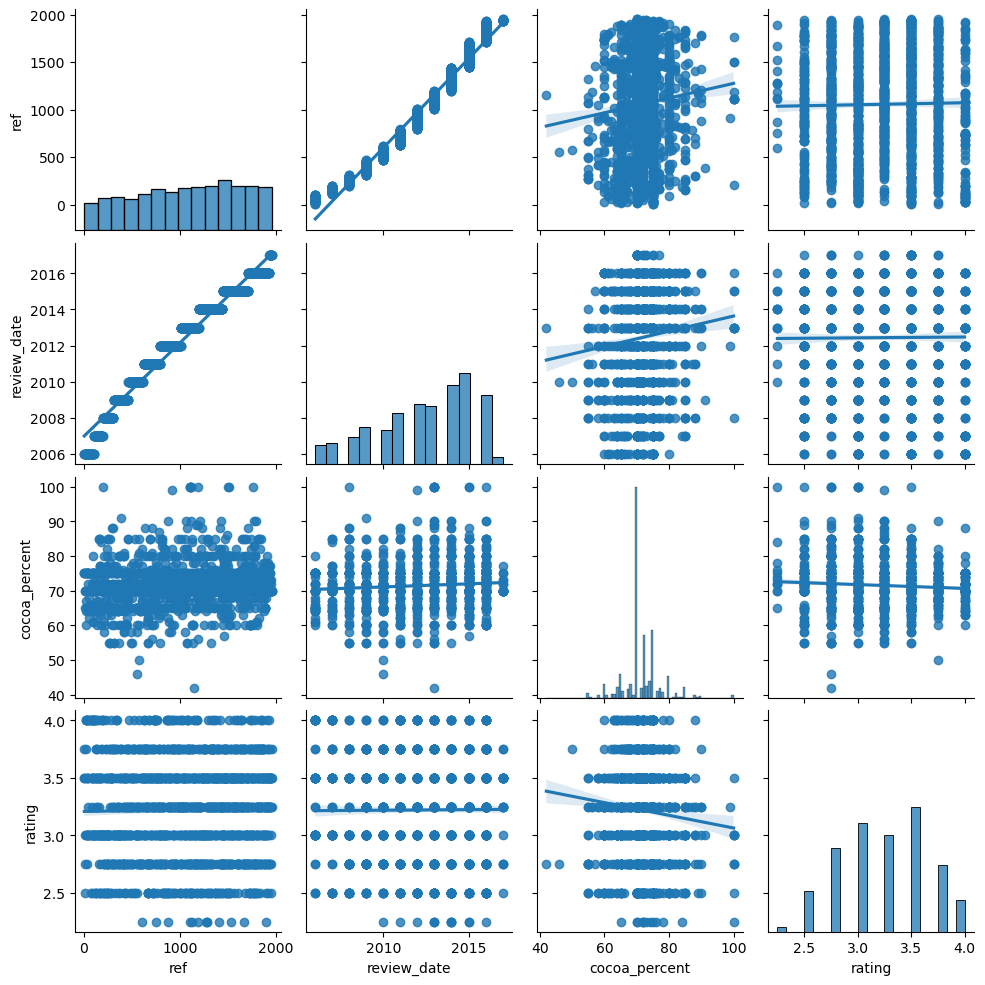

In [186]:
sns.pairplot(cacao, kind = 'reg')

#### Используем для наглядности матрицу корреляций

In [187]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


- Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить, пусть это будет переменная REF.
- Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.
- Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

### Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных при помощи box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

#### Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение, например, по 10 самых частотных

In [121]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = column, y = 'rating',
               data = cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
                ax = ax)
    plt.xticks(rotation = 45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

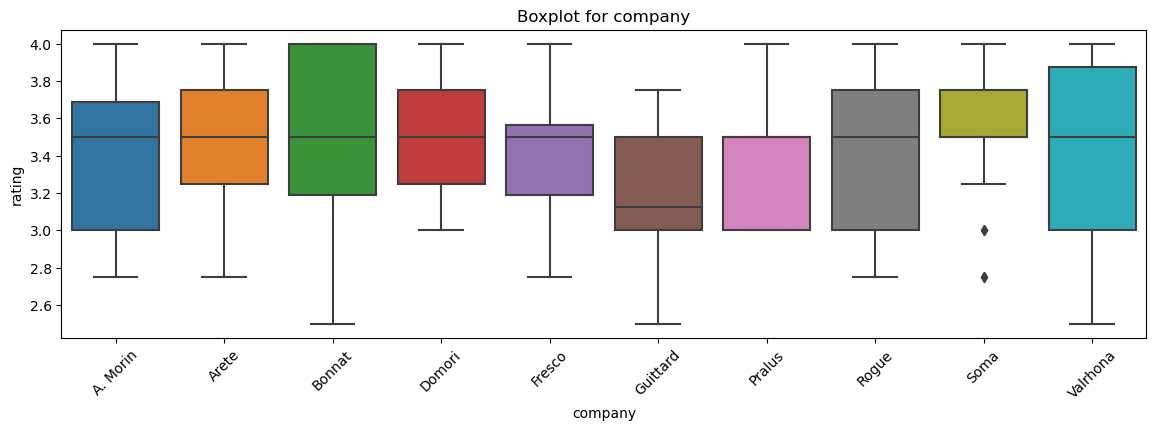

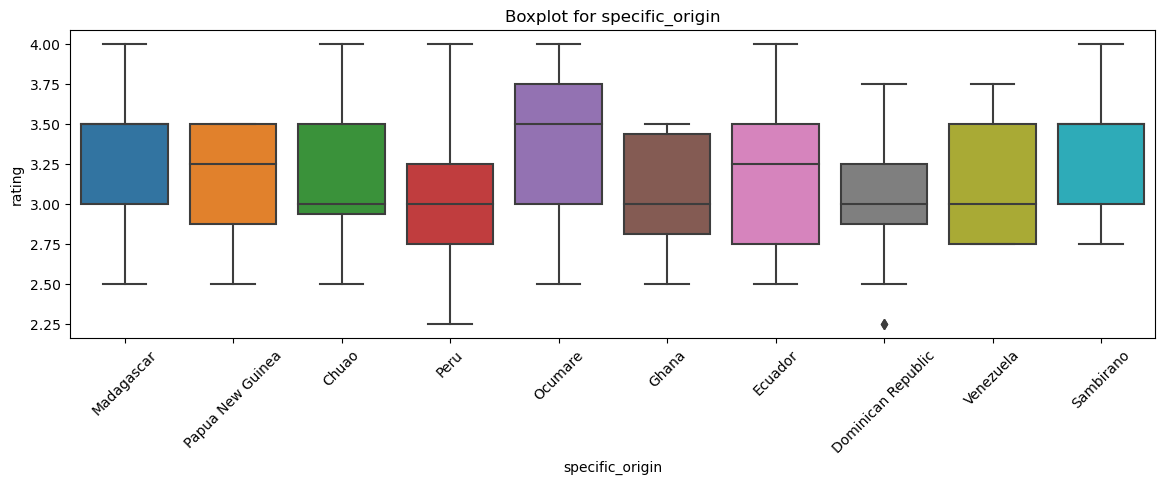

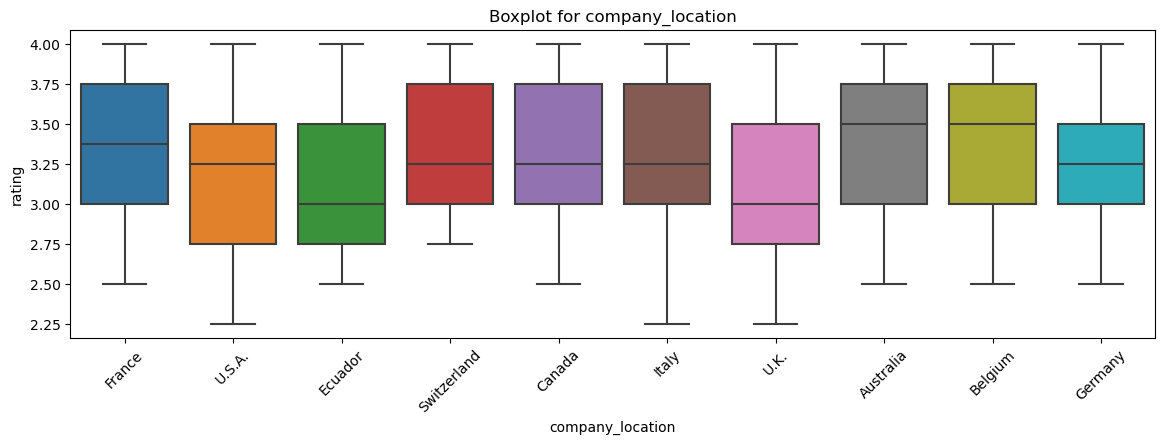

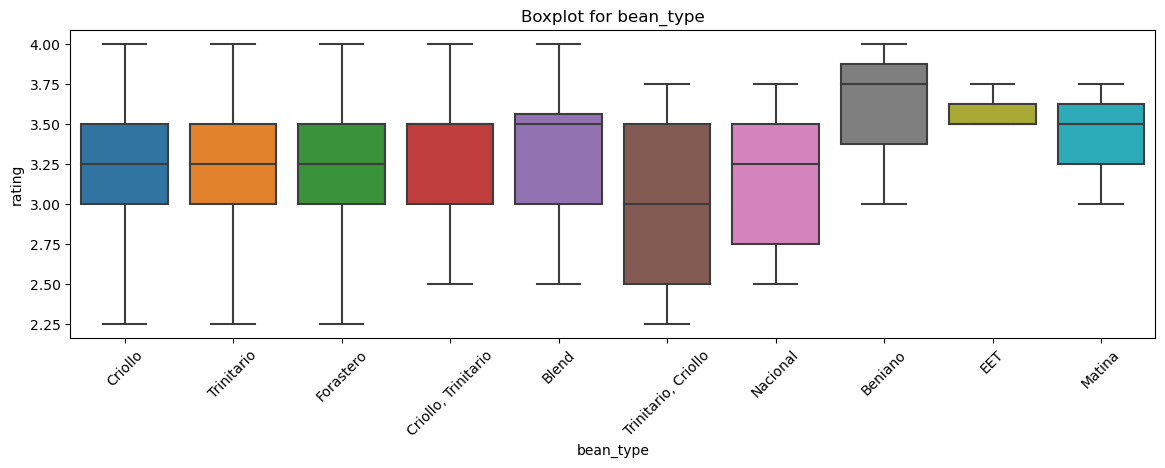

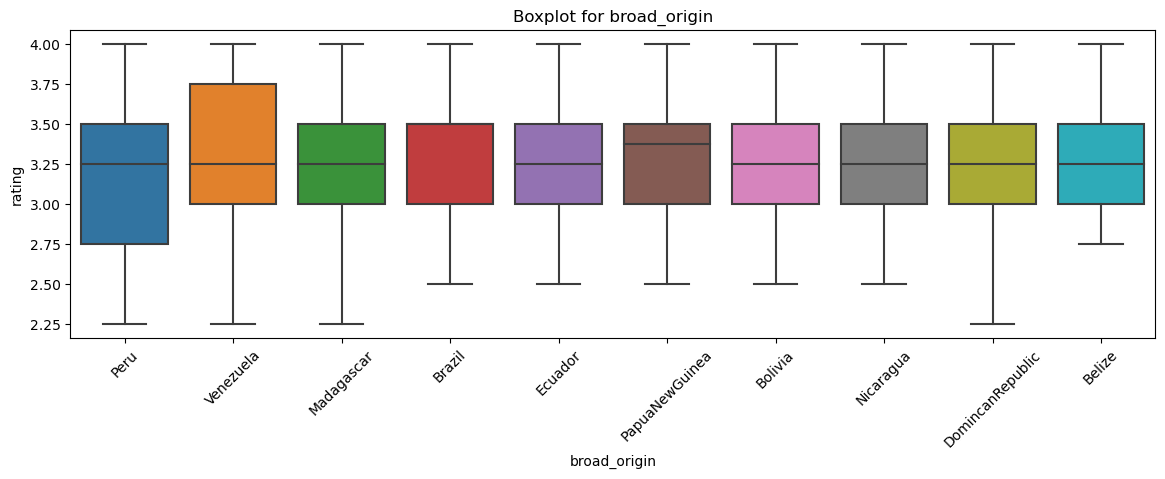

In [189]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

Графики показывают, что все параметры, кроме broad_origin, могут влиять на оценку батончика. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика.  
**Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.  
Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы.**

In [123]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05 / len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [191]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


Проверка показала, что серьёзно отличаются три параметра: company,  specific_origin и  company_location. Оставим эти переменные в датасете для дальнейшего построения модели. **Итак, в данном случае важные переменные, которые, возможно, оказывают влияние на оценку: company, specific_origin, company_location, review_date, cocoa_percent.**

In [192]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0


### Выводы
**В результате EDA для анализа влияния параметров шоколада на экспертную оценку шок. батончиков были получены следующие выводы:**  
- В данных достаточно мало пропущенных значений, только столбец bean_type был заполнен в малом количестве случаев.  
- Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод о том, что данные достаточно чистые.  
- Положительная корреляция параметра review_date и rating может говорить о том, что с годами рейтинги потихоньку завышаются, либо батончики становятся лучше.  
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели: **company, specific_origin, company_location, review_date и cocoa_percent**.